In [240]:
import os
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

In [241]:
df = pd.read_parquet(os.path.join('data','jizdenky.parquet'))

In [242]:
df = df[df['odkud'].str.contains('Ostrava') | df['odkud'].str.contains('Praha')]
df = df[df['kam'].str.contains('Ostrava') | df['kam'].str.contains('Praha')]

In [243]:
df = df[df['odjezd'] >= '2024-11-08']

In [244]:
df = df[df['prostredek'] != 'autobus']

In [245]:
df = df[df['prestupy'] == 0]

In [246]:
# df = df.explode('obsazenost')
# df = df.explode('vlaky')

In [247]:
df['jizdni_doba'].quantile([0.1,0.25,0.5,0.75,0.666,0.8,0.9,0.95])

0.100    189.0
0.250    192.0
0.500    202.0
0.750    209.0
0.666    204.0
0.800    209.0
0.900    212.0
0.950    216.0
Name: jizdni_doba, dtype: float64

In [248]:
nejdelsi = df['jizdni_doba'].quantile(0.95)
nejdelsi

216.0

In [249]:
df = df[df['jizdni_doba'] <= nejdelsi]

In [250]:
df = df[df['predstih_h'] <= 4]

In [251]:
df['spoj'] = df.apply(lambda row: f"""{row['prodejce']} {row['den']} {row['odjezd'].hour:02}:{row['odjezd'].minute:02}""", axis=1)

In [252]:
df[df['volnych_mist'] == 0].groupby('prodejce').size()

C:\Users\micha\AppData\Local\Temp\ipykernel_4932\2460927356.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[df['volnych_mist'] == 0].groupby('prodejce').size()


prodejce
ARR     0
LE      0
RJ     25
ČD      0
dtype: int64

In [253]:
ceskedrahy_obsazenost = pd.DataFrame(df[(df['prodejce'] == 'ČD')].explode('obsazenost').groupby('obsazenost').size() / len(df[(df['prodejce'] == 'ČD')].explode('obsazenost'))).reset_index()
ceskedrahy_obsazenost

,obsazenost,0
0,Předpokládané nízké obsazení,0.381883
1,Předpokládané střední obsazení - doporučujeme ...,0.364121
2,Předpokládané vysoké obsazení - doporučujeme v...,0.168739


In [254]:
df[(df['prodejce'] == 'LE') & (df['volnych_mist'].isnull())]

,oscrapovano,prodejce,odkud,kam,odjezd,predstih,predstih_d,predstih_h,cena,prostredek,volnych_mist,obsazenost,jizdni_doba,vzdalenost,zpozdeni,cena_poznamka,den,prestupy,vlaky,mistenka_zdarma,nahradni_bus,volna_mista_economy,volna_mista_economy_plus,volna_mista_economy_business,volna_mista_premium,spoj
436357,2024-11-15 10:11:51,LE,Praha hl.n.,Ostrava hl.n.,2024-11-15 13:00:00,0 days 02:48:09,0,2.802500,NaN,None,NaN,None,211.0,356.0,None,None,pá,0,[LE1259],None,None,NaN,NaN,NaN,NaN,LE pá 13:00
439660,2024-11-15 12:11:18,LE,Praha hl.n.,Ostrava-Svinov,2024-11-15 13:00:00,0 days 00:48:42,0,0.811667,NaN,None,NaN,None,204.0,351.0,None,None,pá,0,[LE1259],None,None,NaN,NaN,NaN,NaN,LE pá 13:00
439661,2024-11-15 12:11:18,LE,Praha hl.n.,Ostrava hl.n.,2024-11-15 13:00:00,0 days 00:48:42,0,0.811667,NaN,None,NaN,None,211.0,356.0,None,None,pá,0,[LE1259],None,None,NaN,NaN,NaN,NaN,LE pá 13:00


In [255]:
df['volnych_mist'] = df['volnych_mist'].fillna(0)

In [256]:
df[(df['prodejce'] == 'LE') & (df['volnych_mist'].isnull())]

,oscrapovano,prodejce,odkud,kam,odjezd,predstih,predstih_d,predstih_h,cena,prostredek,volnych_mist,obsazenost,jizdni_doba,vzdalenost,zpozdeni,cena_poznamka,den,prestupy,vlaky,mistenka_zdarma,nahradni_bus,volna_mista_economy,volna_mista_economy_plus,volna_mista_economy_business,volna_mista_premium,spoj


In [257]:
df[(df['prodejce'] == 'LE') & (df['volnych_mist'] == 0)]

,oscrapovano,prodejce,odkud,kam,odjezd,predstih,predstih_d,predstih_h,cena,prostredek,volnych_mist,obsazenost,jizdni_doba,vzdalenost,zpozdeni,cena_poznamka,den,prestupy,vlaky,mistenka_zdarma,nahradni_bus,volna_mista_economy,volna_mista_economy_plus,volna_mista_economy_business,volna_mista_premium,spoj
436357,2024-11-15 10:11:51,LE,Praha hl.n.,Ostrava hl.n.,2024-11-15 13:00:00,0 days 02:48:09,0,2.802500,NaN,None,0.0,None,211.0,356.0,None,None,pá,0,[LE1259],None,None,NaN,NaN,NaN,NaN,LE pá 13:00
439660,2024-11-15 12:11:18,LE,Praha hl.n.,Ostrava-Svinov,2024-11-15 13:00:00,0 days 00:48:42,0,0.811667,NaN,None,0.0,None,204.0,351.0,None,None,pá,0,[LE1259],None,None,NaN,NaN,NaN,NaN,LE pá 13:00
439661,2024-11-15 12:11:18,LE,Praha hl.n.,Ostrava hl.n.,2024-11-15 13:00:00,0 days 00:48:42,0,0.811667,NaN,None,0.0,None,211.0,356.0,None,None,pá,0,[LE1259],None,None,NaN,NaN,NaN,NaN,LE pá 13:00


In [258]:
df[df['prodejce'] == 'LE']['volnych_mist'].quantile([0.1,0.5,0.9])

0.1    14.0
0.5    33.0
0.9    46.0
Name: volnych_mist, dtype: float64

In [259]:
hranice_plnosti = ceskedrahy_obsazenost[ceskedrahy_obsazenost['obsazenost'].str.contains('vysoké')][0].max()
hranice_plnosti

0.16873889875666073

In [260]:
hranice_prazdnosti = ceskedrahy_obsazenost[ceskedrahy_obsazenost['obsazenost'].str.contains('nízké')][0].max()
hranice_prazdnosti = 1 - hranice_prazdnosti
hranice_prazdnosti

0.6181172291296626

In [261]:
plnost_railjetu = df[df['prodejce'] == 'RJ']['volnych_mist'].quantile(hranice_plnosti).round(0)
plnost_railjetu

4.0

In [262]:
plnost_lea = df[df['prodejce'] == 'LE']['volnych_mist'].quantile(hranice_plnosti).round(0)
plnost_lea

20.0

In [263]:
df[(df['prodejce'] == 'ČD') & df['obsazenost'].astype(str).str.contains('vysoké obsazení',na=False)]

,oscrapovano,prodejce,odkud,kam,odjezd,predstih,predstih_d,predstih_h,cena,prostredek,volnych_mist,obsazenost,jizdni_doba,vzdalenost,zpozdeni,cena_poznamka,den,prestupy,vlaky,mistenka_zdarma,nahradni_bus,volna_mista_economy,volna_mista_economy_plus,volna_mista_economy_business,volna_mista_premium,spoj
143545,2024-11-08 08:03:15,ČD,Praha hl.n.,Ostrava hl.n.,2024-11-08 08:19:00,0 days 00:15:45,0,0.262500,619.0,vlak,0.0,[Předpokládané vysoké obsazení - doporučujeme ...,209.0,356.0,[],None,pá,0,[EC 141 Ostravan],True,None,NaN,NaN,NaN,NaN,ČD pá 08:19
144838,2024-11-08 08:53:41,ČD,Praha hl.n.,Ostrava hl.n.,2024-11-08 12:19:00,0 days 03:25:19,0,3.421944,619.0,vlak,0.0,[Předpokládané vysoké obsazení - doporučujeme ...,209.0,356.0,[0],None,pá,0,[EC 143 Ostravan],True,None,NaN,NaN,NaN,NaN,ČD pá 12:19
144850,2024-11-08 08:53:41,ČD,Praha hl.n.,Ostrava hl.n.,2024-11-08 11:32:00,0 days 02:38:19,0,2.638611,689.0,vlak,0.0,[Předpokládané vysoké obsazení - doporučujeme ...,192.0,356.0,[0],None,pá,0,[SC 505 Pendolino],None,None,NaN,NaN,NaN,NaN,ČD pá 11:32
144856,2024-11-08 08:54:00,ČD,Ostrava hl.n.,Praha hl.n.,2024-11-08 12:12:00,0 days 03:18:00,0,3.300000,535.0,vlak,0.0,[Předpokládané vysoké obsazení - doporučujeme ...,202.0,356.0,[0],None,pá,0,[EC 142 Ostravan],True,None,NaN,NaN,NaN,NaN,ČD pá 12:12
150523,2024-11-08 11:26:36,ČD,Praha hl.n.,Ostrava hl.n.,2024-11-08 11:32:00,0 days 00:05:24,0,0.090000,689.0,vlak,0.0,[Předpokládané vysoké obsazení - doporučujeme ...,192.0,356.0,[],None,pá,0,[SC 505 Pendolino],None,None,NaN,NaN,NaN,NaN,ČD pá 11:32
150524,2024-11-08 11:26:36,ČD,Praha hl.n.,Ostrava hl.n.,2024-11-08 12:19:00,0 days 00:52:24,0,0.873333,609.0,vlak,0.0,[Předpokládané vysoké obsazení - doporučujeme ...,209.0,356.0,[0],None,pá,0,[EC 143 Ostravan],True,None,NaN,NaN,NaN,NaN,ČD pá 12:19
150526,2024-11-08 11:26:36,ČD,Praha hl.n.,Ostrava hl.n.,2024-11-08 14:19:00,0 days 02:52:24,0,2.873333,609.0,vlak,0.0,[Předpokládané vysoké obsazení - doporučujeme ...,209.0,356.0,[0],None,pá,0,[EC 117 Silesia],True,None,NaN,NaN,NaN,NaN,ČD pá 14:19
150536,2024-11-08 11:26:55,ČD,Ostrava hl.n.,Praha hl.n.,2024-11-08 15:10:00,0 days 03:43:05,0,3.718056,769.0,vlak,0.0,[Předpokládané vysoké obsazení - doporučujeme ...,189.0,356.0,[0],None,pá,0,[SC 504 Pendolino],None,None,NaN,NaN,NaN,NaN,ČD pá 15:10
150538,2024-11-08 11:26:55,ČD,Ostrava hl.n.,Praha hl.n.,2024-11-08 12:12:00,0 days 00:45:05,0,0.751389,619.0,vlak,0.0,[Předpokládané vysoké obsazení - doporučujeme ...,202.0,356.0,[16],None,pá,0,[EC 142 Ostravan],True,None,NaN,NaN,NaN,NaN,ČD pá 12:12
153874,2024-11-08 13:05:16,ČD,Praha hl.n.,Ostrava-Svinov,2024-11-08 16:32:00,0 days 03:26:44,0,3.445556,769.0,vlak,0.0,[Předpokládané vysoké obsazení - doporučujeme ...,188.0,351.0,[0],None,pá,0,[SC 513 Pendolino],None,None,NaN,NaN,NaN,NaN,ČD pá 16:32


In [264]:
def obdobi(radek):
    return f"""{radek['odjezd'].dayofweek + 1}-{radek['odjezd'].hour // 4}"""

In [265]:
df['obdobi'] = df.apply(lambda row: obdobi(row), axis=1)

In [314]:
df[['spoj','obdobi']].sample(10)

,spoj,obdobi
285822,LE po 20:00,1-5
474261,ČD so 12:12,6-3
351383,LE st 11:00,3-2
432630,LE pá 09:04,5-2
351392,LE st 11:04,3-2
306130,RJ út 07:50,2-1
443583,LE pá 16:00,5-4
397701,ČD čt 13:32,4-3
188913,LE so 08:00,6-2
494236,RJ so 19:50,6-4


In [267]:
prgova = df[df['odkud'].str.contains('Pra') & df['kam'].str.contains('Ostra')]

In [268]:
ovaprg = df[df['odkud'].str.contains('Ostra') & df['kam'].str.contains('Pra')]

<Axes: xlabel='obdobi'>

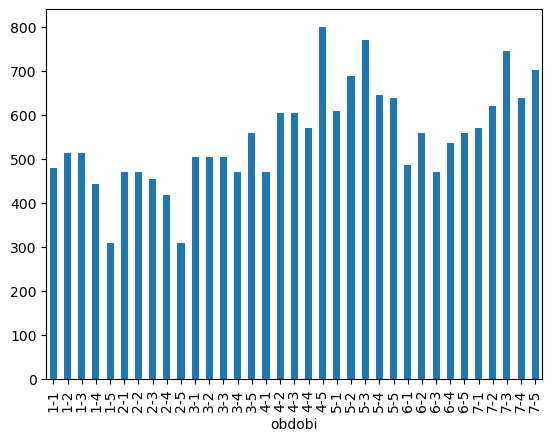

In [269]:
prgova.groupby('obdobi')['cena'].median().plot.bar()

<Axes: xlabel='obdobi'>

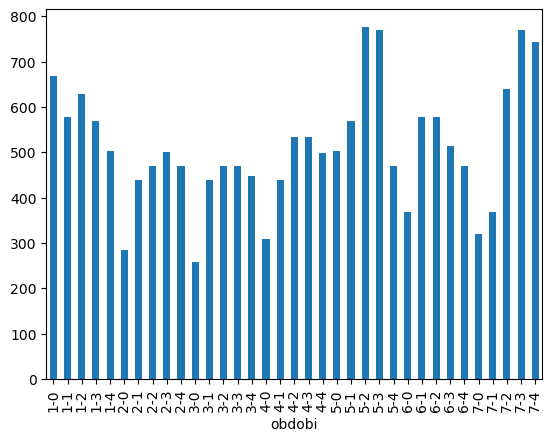

In [270]:
ovaprg.groupby('obdobi')['cena'].median().plot.bar()

In [338]:
df.groupby("predstih_d")['cena'].median()

predstih_d
-1    570.0
 0    569.0
Name: cena, dtype: float64

In [332]:
vm_ovaprg = ovaprg[((ovaprg['prodejce'].isin(['RJ','LE'])) & (ovaprg['volnych_mist'] <= 20))].groupby('obdobi').size() / ovaprg[ovaprg['prodejce'].isin(['LE','RJ'])].groupby('obdobi').size()
vm_ovaprg

obdobi
1-0         NaN
1-1         NaN
1-2         NaN
1-3         NaN
1-4         NaN
2-0    0.500000
2-1    0.333333
2-2         NaN
2-3         NaN
2-4         NaN
3-0         NaN
3-1    0.333333
3-2    0.125000
3-3         NaN
3-4         NaN
4-0         NaN
4-1         NaN
4-2         NaN
4-3    0.166667
4-4         NaN
5-0         NaN
5-1    0.666667
5-2    0.500000
5-3    0.500000
5-4    0.222222
6-0         NaN
6-1    0.166667
6-2    0.250000
6-3    0.125000
6-4         NaN
7-0         NaN
7-1         NaN
7-2    0.111111
7-3    0.666667
7-4    0.631579
dtype: float64

In [334]:
vm_prgova = prgova[((prgova['prodejce'].isin(['RJ','LE'])) & (prgova['volnych_mist'] <= 20))].groupby('obdobi').size() / prgova[prgova['prodejce'].isin(['LE','RJ'])].groupby('obdobi').size()
vm_prgova

obdobi
1-1         NaN
1-2         NaN
1-3         NaN
1-4         NaN
1-5         NaN
2-1         NaN
2-2         NaN
2-3         NaN
2-4         NaN
2-5         NaN
3-1         NaN
3-2         NaN
3-3         NaN
3-4         NaN
3-5         NaN
4-1         NaN
4-2         NaN
4-3    0.357143
4-4    0.571429
4-5         NaN
5-1         NaN
5-2    0.818182
5-3    0.857143
5-4    0.400000
5-5         NaN
6-1         NaN
6-2         NaN
6-3         NaN
6-4         NaN
6-5         NaN
7-1         NaN
7-2    0.200000
7-3    0.857143
7-4    0.681818
7-5         NaN
dtype: float64

In [336]:
vm_prgova - vm_ovaprg

obdobi
1-0         NaN
1-1         NaN
1-2         NaN
1-3         NaN
1-4         NaN
1-5         NaN
2-0         NaN
2-1         NaN
2-2         NaN
2-3         NaN
2-4         NaN
2-5         NaN
3-0         NaN
3-1         NaN
3-2         NaN
3-3         NaN
3-4         NaN
3-5         NaN
4-0         NaN
4-1         NaN
4-2         NaN
4-3    0.190476
4-4         NaN
4-5         NaN
5-0         NaN
5-1         NaN
5-2    0.318182
5-3    0.357143
5-4    0.177778
5-5         NaN
6-0         NaN
6-1         NaN
6-2         NaN
6-3         NaN
6-4         NaN
6-5         NaN
7-0         NaN
7-1         NaN
7-2    0.088889
7-3    0.190476
7-4    0.050239
7-5         NaN
dtype: float64

In [271]:
df[df['volnych_mist'] == 0].groupby('odjezd').size()

odjezd
2024-11-08 08:19:00    1
2024-11-08 09:10:00    1
2024-11-08 09:32:00    1
2024-11-08 10:12:00    1
2024-11-08 10:19:00    1
2024-11-08 11:32:00    2
2024-11-08 12:12:00    2
2024-11-08 12:19:00    2
2024-11-08 13:10:00    2
2024-11-08 13:32:00    2
2024-11-08 14:12:00    2
2024-11-08 14:19:00    2
2024-11-08 15:10:00    3
2024-11-08 15:32:00    2
2024-11-08 16:12:00    2
2024-11-08 16:19:00    2
2024-11-08 16:32:00    2
2024-11-08 17:10:00    1
2024-11-08 17:32:00    2
2024-11-08 18:12:00    2
2024-11-08 18:19:00    2
2024-11-08 19:26:00    2
2024-11-08 19:32:00    2
2024-11-08 20:19:00    2
2024-11-09 06:00:00    1
2024-11-09 06:02:00    1
2024-11-09 06:18:00    1
2024-11-09 06:19:00    1
2024-11-09 07:10:00    1
2024-11-09 08:12:00    2
2024-11-09 08:19:00    2
2024-11-09 09:10:00    2
2024-11-09 09:32:00    2
2024-11-09 10:12:00    1
2024-11-09 10:19:00    2
2024-11-09 10:53:00    1
2024-11-09 11:32:00    2
2024-11-09 12:12:00    1
2024-11-09 12:19:00    2
2024-11-09 13:10:0

In [272]:
df.groupby('spoj')['cena'].median().nsmallest(10)

spoj
LE ne 03:56    199.0
LE ne 04:03    199.0
LE st 03:56    199.0
LE st 04:03    199.0
LE st 18:57    239.0
LE st 19:04    239.0
LE út 03:56    249.0
LE út 04:03    249.0
LE čt 03:56    249.0
LE čt 04:03    249.0
Name: cena, dtype: float64

In [273]:
df.groupby('spoj')['cena'].median().nlargest(10)

spoj
LE pá 11:00    1479.0
LE ne 15:57    1324.0
LE ne 16:04    1324.0
LE pá 13:00    1269.0
LE pá 13:07    1269.0
LE ne 16:00    1039.0
LE ne 10:57     999.0
LE ne 11:04     999.0
LE ne 11:57     999.0
LE ne 12:04     999.0
Name: cena, dtype: float64

In [274]:
df[df['predstih_h'] < 4].groupby('spoj')['volnych_mist'].min().nlargest(10)

spoj
RJ čt 02:36    294.0
RJ po 19:50    288.0
RJ ne 02:36    283.0
RJ út 19:50    280.0
RJ st 19:50    267.0
RJ út 09:50    254.0
RJ pá 02:36    237.0
RJ čt 21:22    237.0
RJ po 21:22    236.0
RJ st 18:53    234.0
Name: volnych_mist, dtype: float64

In [275]:
df[df['predstih_h'] < 4].groupby('spoj')['volnych_mist'].median().dropna().nsmallest(50)

spoj
RJ ne 10:53    0.0
RJ ne 12:53    0.0
RJ ne 14:50    0.0
RJ pá 13:50    0.0
RJ pá 14:53    0.0
ČD ne 06:00    0.0
ČD ne 06:02    0.0
ČD ne 06:19    0.0
ČD ne 07:10    0.0
ČD ne 08:12    0.0
ČD ne 08:19    0.0
ČD ne 09:10    0.0
ČD ne 09:32    0.0
ČD ne 10:12    0.0
ČD ne 10:19    0.0
ČD ne 11:32    0.0
ČD ne 12:12    0.0
ČD ne 12:19    0.0
ČD ne 13:10    0.0
ČD ne 13:32    0.0
ČD ne 14:12    0.0
ČD ne 14:19    0.0
ČD ne 15:10    0.0
ČD ne 15:32    0.0
ČD ne 16:12    0.0
ČD ne 16:18    0.0
ČD ne 16:19    0.0
ČD ne 17:10    0.0
ČD ne 17:32    0.0
ČD ne 18:12    0.0
ČD ne 18:19    0.0
ČD ne 19:26    0.0
ČD ne 19:32    0.0
ČD ne 20:19    0.0
ČD ne 21:27    0.0
ČD po 06:00    0.0
ČD po 06:02    0.0
ČD po 06:18    0.0
ČD po 06:19    0.0
ČD po 07:10    0.0
ČD po 08:12    0.0
ČD po 08:19    0.0
ČD po 09:10    0.0
ČD po 09:32    0.0
ČD po 10:12    0.0
ČD po 10:19    0.0
ČD po 11:32    0.0
ČD po 12:12    0.0
ČD po 12:19    0.0
ČD po 13:10    0.0
Name: volnych_mist, dtype: float64

In [340]:
def mistenkovy(radek):
    if radek['prodejce'] in ['LE','RJ']:
        return True
    elif 'SC ' in str(radek['vlaky']):
        return True
    else:
        return False

In [342]:
df['mistenkovy'] = df.apply(lambda row: mistenkovy(row), axis=1)

In [344]:
len(df[df['mistenkovy'] == True]['spoj'].drop_duplicates()) / len(df['spoj'].drop_duplicates())

0.6674259681093394

In [350]:
df[df['mistenkovy'] == False]['spoj'].sort_values().drop_duplicates()

505191    ČD ne 06:00
505209    ČD ne 06:02
229095    ČD ne 06:19
229116    ČD ne 07:10
233748    ČD ne 08:12
233725    ČD ne 08:19
233747    ČD ne 09:10
233749    ČD ne 10:12
233727    ČD ne 10:19
513241    ČD ne 12:12
513209    ČD ne 12:19
520937    ČD ne 14:12
245491    ČD ne 14:19
241908    ČD ne 15:32
250240    ČD ne 16:12
250209    ČD ne 16:19
520914    ČD ne 17:32
532458    ČD ne 18:12
528581    ČD ne 18:19
532459    ČD ne 19:26
253968    ČD ne 20:19
266749    ČD po 06:00
266767    ČD po 06:02
266745    ČD po 06:19
266783    ČD po 07:10
266784    ČD po 08:12
266747    ČD po 08:19
266782    ČD po 09:10
270871    ČD po 10:12
274697    ČD po 10:19
274707    ČD po 12:12
277647    ČD po 12:19
280470    ČD po 14:12
277646    ČD po 14:19
280456    ČD po 15:32
280472    ČD po 16:12
283153    ČD po 16:19
283156    ČD po 17:32
286558    ČD po 18:12
286532    ČD po 18:19
286559    ČD po 19:26
286526    ČD po 20:19
425217    ČD pá 06:00
425239    ČD pá 06:02
425219    ČD pá 06:19
425236    

In [372]:
df.columns

Index(['oscrapovano', 'prodejce', 'odkud', 'kam', 'odjezd', 'predstih',
       'predstih_d', 'predstih_h', 'cena', 'prostredek', 'volnych_mist',
       'obsazenost', 'jizdni_doba', 'vzdalenost', 'zpozdeni', 'cena_poznamka',
       'den', 'prestupy', 'vlaky', 'mistenka_zdarma', 'nahradni_bus',
       'volna_mista_economy', 'volna_mista_economy_plus',
       'volna_mista_economy_business', 'volna_mista_premium', 'spoj', 'obdobi',
       'mistenkovy'],
      dtype='object')

In [374]:
df[df['prodejce'] == 'LE'][['odkud','odjezd','predstih_h','volna_mista_economy', 'volna_mista_economy_plus',
       'volna_mista_economy_business', 'volna_mista_premium','cena']].sort_values(by='cena')

,odkud,odjezd,predstih_h,volna_mista_economy,volna_mista_economy_plus,volna_mista_economy_business,volna_mista_premium,cena
343288,Ostrava hl.n.,2024-11-13 03:56:00,3.632222,21.0,9.0,9.0,1.0,199.0
504645,Ostrava hl.n.,2024-11-17 03:56:00,3.565556,21.0,13.0,8.0,3.0,199.0
228597,Ostrava hl.n.,2024-11-10 03:56:00,3.639167,21.0,9.0,10.0,3.0,199.0
228596,Ostrava-Svinov,2024-11-10 04:03:00,3.755833,21.0,9.0,10.0,3.0,199.0
504634,Ostrava-Svinov,2024-11-17 04:03:00,3.682222,21.0,13.0,8.0,3.0,199.0
343290,Ostrava-Svinov,2024-11-13 04:03:00,3.748889,21.0,9.0,9.0,1.0,199.0
368667,Ostrava-Svinov,2024-11-13 19:04:00,2.712778,21.0,18.0,16.0,2.0,239.0
368668,Ostrava hl.n.,2024-11-13 18:57:00,2.596111,21.0,18.0,16.0,2.0,239.0
372517,Ostrava hl.n.,2024-11-13 18:57:00,0.719444,21.0,17.0,15.0,2.0,239.0
372518,Ostrava-Svinov,2024-11-13 19:04:00,0.836111,21.0,17.0,15.0,2.0,239.0


In [414]:
df[df['prodejce'].isin(['RJ','LE'])].groupby('obdobi')['volnych_mist'].quantile(0.33).nsmallest(20)

obdobi
7-3     1.00
5-2     7.00
5-3     7.00
7-4    11.60
5-1    13.88
4-3    21.00
3-2    28.00
5-5    28.00
7-2    28.18
3-3    30.00
7-5    30.00
1-0    31.00
6-2    32.51
5-4    32.56
4-5    33.00
4-2    34.00
4-4    34.44
6-1    34.55
2-3    35.00
3-5    36.00
Name: volnych_mist, dtype: float64

In [416]:
spicka = df[df['prodejce'].isin(['RJ','LE'])].groupby('obdobi')['volnych_mist'].quantile(0.33).nsmallest(4).index.to_list()

In [ ]:
df[df['obdobi'].isin(spicka)]

In [388]:
df.groupby('obdobi')['cena'].median().nlargest()

obdobi
4-5    799.0
5-3    769.0
7-3    759.0
7-5    701.5
5-2    689.0
Name: cena, dtype: float64